In [ ]:
from google.colab import files
upload = files.upload()

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/gesture.zip' -d '/content/drive/MyDrive/Handgesture'

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
directory = '/content/drive/MyDrive/Handgesture/HandGesture/images'

In [ ]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']
10


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

call_me
fingers_crossed
okay
paper
peace
rock
rock_on
scissor
thumbs
up


In [ ]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [ ]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [ ]:
print(np.unique(data))

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.9647059  0.96862745 0.972549
 0.9764706  0.98039216 0.9843137  0.9882353  0.99215686 0.99607843
 1.        ]


In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [ ]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [ ]:
print(len(tlabels))

1243


In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=123)
trainx,valx,trainy,valy=train_test_split(trainx,trainy,test_size=0.25,random_state=123)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2400, 60, 60, 3)
(800, 60, 60, 3)
(2400, 10)
(800, 10)


In [ ]:
plt.figure(figsize=(20,20))
for i, image in enumerate (data):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    #plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

trainx,trainy = process_images(trainx,trainy)
testx,testy = process_images(testx,testy)
valx,valy = process_images(valx,valy)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print(np.shape(trainx))
print(valy[1])

(2400, 227, 227, 3)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model.fit(trainx,trainy,epochs=10,batch_size = 32,validation_data=(valx, valy),validation_freq=1)

Epoch 1/10
75/75 [==============================] - 415s 5s/step - loss: 2.8698 - accuracy: 0.2992 - val_loss: 2.1938 - val_accuracy: 0.2087
Epoch 2/10
75/75 [==============================] - 406s 5s/step - loss: 1.3649 - accuracy: 0.5725 - val_loss: 2.0065 - val_accuracy: 0.4288
Epoch 3/10
75/75 [==============================] - 401s 5s/step - loss: 0.8609 - accuracy: 0.7217 - val_loss: 1.5189 - val_accuracy: 0.5113
Epoch 4/10
75/75 [==============================] - 398s 5s/step - loss: 0.6488 - accuracy: 0.7875 - val_loss: 0.7793 - val_accuracy: 0.7688
Epoch 5/10
75/75 [==============================] - 397s 5s/step - loss: 0.4551 - accuracy: 0.8496 - val_loss: 0.4104 - val_accuracy: 0.8913
Epoch 6/10
75/75 [==============================] - 393s 5s/step - loss: 0.3601 - accuracy: 0.8783 - val_loss: 0.2400 - val_accuracy: 0.9262
Epoch 7/10
75/75 [==============================] - 397s 5s/step - loss: 0.3130 - accuracy: 0.8979 - val_loss: 0.1869 - val_accuracy: 0.9413
Epoch 8/10
75

25/25 [==============================] - 1s 34ms/step - loss: 0.0914 - accuracy: 0.9737
Test loss: 0.0913722887635231
Test accuracy: 0.9737499952316284


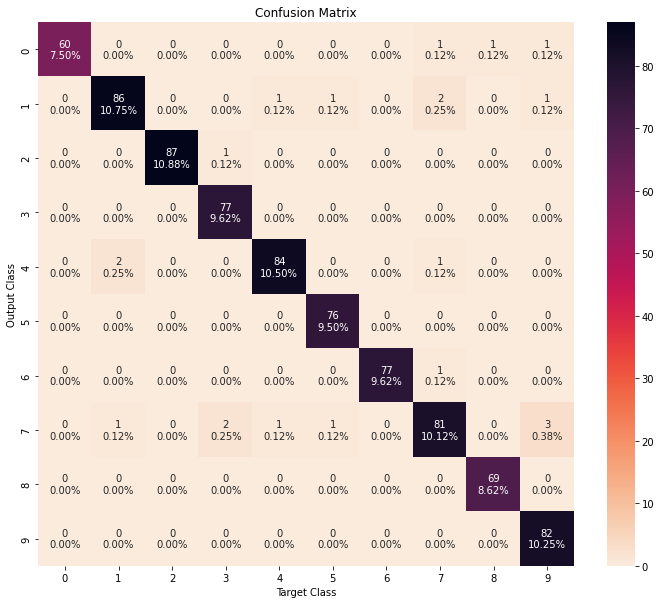

In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((testy.shape[1],testy.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')
# Evaluate the trained model using keras built-in function
score = model.evaluate(testx, testy, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(model.predict(testx), axis=1)
y_true =  np.argmax(testy, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

def process1_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (224,224))
    return image, label

trainx,trainy = process1_images(trainx,trainy)
testx,testy = process1_images(testx,testy)
valx,valy = process1_images(valx,valy)

In [ ]:
def process1_images(image, label):
  # Normalize images to have a mean of 0 and standard deviation of 1
  image = tf.image.per_image_standardization(image)
  # Resize images from 32x32 to 224x224
  image = tf.image.resize(image, (224,224))
  return image, label

trainx,trainy = process1_images(trainx,trainy) 
testx,testy = process1_images(testx,testy) 
valx,valy = process1_images(valx,valy)

In [ ]:
print(trainy[10])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
# input  
input = Input(shape =(224,224,3))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block  
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers  
x = Flatten()(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dense(units = 4096, activation ='relu')(x) 
output = Dense(units = 10, activation ='softmax')(x)

# creating the model

model = Model (inputs=input, outputs =output)
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_70 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_71 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_15 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 112, 112, 128)     7385

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(trainx,trainy,epochs=2,batch_size = 60,validation_data=(valx, valy),validation_freq=1)

Epoch 1/2
40/40 [==============================] - 40s 968ms/step - loss: 1.6323 - accuracy: 0.4712 - val_loss: 2.3063 - val_accuracy: 0.1088
Epoch 2/2
34/40 [========================>.....] - ETA: 5s - loss: 0.7271 - accuracy: 0.7956

25/25 [==============================] - 4s 133ms/step - loss: 2.3766 - accuracy: 0.0975
Test loss: 2.3765742778778076
Test accuracy: 0.09749999642372131


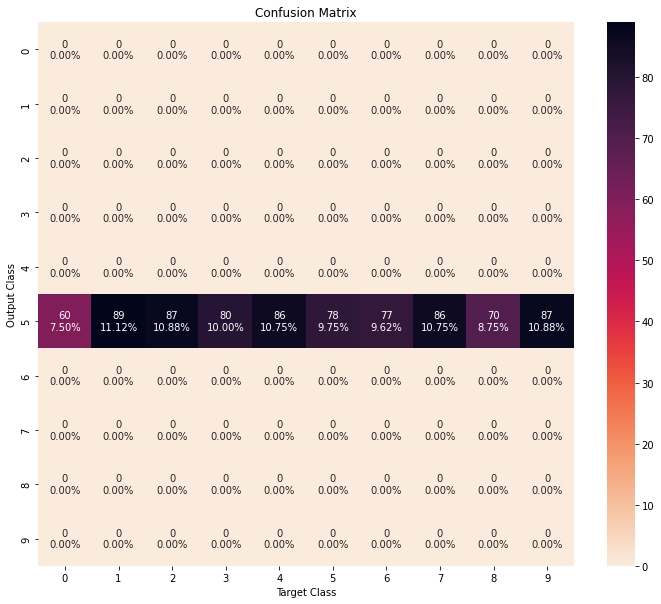

In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((testy.shape[1],testy.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')
# Evaluate the trained model using keras built-in function
score = model.evaluate(testx, testy, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(model.predict(testx), axis=1)
y_true =  np.argmax(testy, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

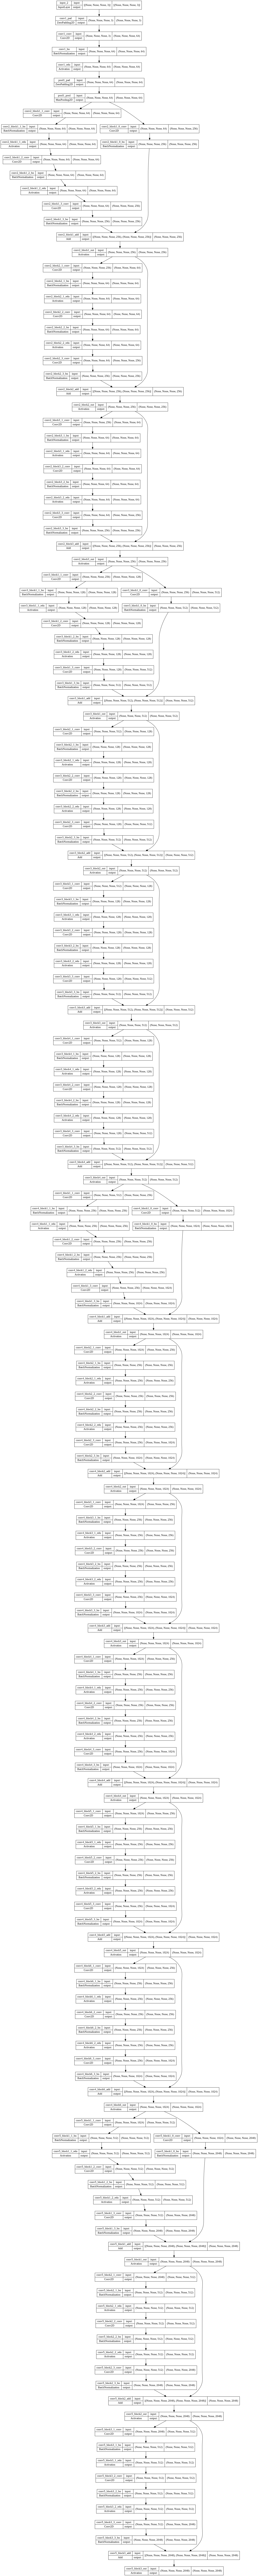

In [ ]:
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)
from keras.utils.vis_utils import plot_model
plot_model(base_model, to_file=os.path.join('./','model_plot_ex.png'), show_shapes=True, show_layer_names=True)

In [ ]:
for layer in base_model.layers:
    layer.trainable = True # Set this to True if you want to re-train the entire network.

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout


CLASSES = 10
# These layers were removed by setting include_top=false, but we still want them
x = base_model.output                          # The output layer of the googleNet
x = GlobalAveragePooling2D(name='avg_pool')(x) # This layer is used to downsample the features
x = Dropout(0.4)(x)                            # This layer is used to enforce feature redundancy 

# This layer specifies our classifier output
predictions = Dense(CLASSES, activation='softmax')(x)
#
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
EPOCHS = 30
BATCH_SIZE = 11
STEPS_PER_EPOCH = 5
VALIDATION_STEPS = 1
#MODEL_FILE = os.path.join('./','model_ex')
#model.fit()
model.fit(trainx,trainy,epochs=10,batch_size = 32,validation_data=(valx, valy),validation_freq=1)
  
#model.save(MODEL_FILE)

Epoch 1/10
75/75 [==============================] - 7s 98ms/step - loss: 0.1046 - accuracy: 0.9842 - val_loss: 1.8792 - val_accuracy: 0.7275
Epoch 2/10
75/75 [==============================] - 7s 87ms/step - loss: 0.1495 - accuracy: 0.9796 - val_loss: 1.8085 - val_accuracy: 0.8300
Epoch 3/10
75/75 [==============================] - 6s 80ms/step - loss: 0.0575 - accuracy: 0.9875 - val_loss: 25.2918 - val_accuracy: 0.6700
Epoch 4/10
75/75 [==============================] - 6s 81ms/step - loss: 0.0876 - accuracy: 0.9842 - val_loss: 0.1809 - val_accuracy: 0.9700
Epoch 5/10
75/75 [==============================] - 6s 85ms/step - loss: 0.0385 - accuracy: 0.9925 - val_loss: 0.0783 - val_accuracy: 0.9887
Epoch 6/10
75/75 [==============================] - 5s 72ms/step - loss: 0.0468 - accuracy: 0.9900 - val_loss: 0.9248 - val_accuracy: 0.9200
Epoch 7/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0675 - accuracy: 0.9883 - val_loss: 0.5788 - val_accuracy: 0.9300
Epoch 8/10
7

25/25 [==============================] - 1s 21ms/step - loss: 0.5462 - accuracy: 0.9413
Test loss: 0.546185314655304
Test accuracy: 0.9412500262260437


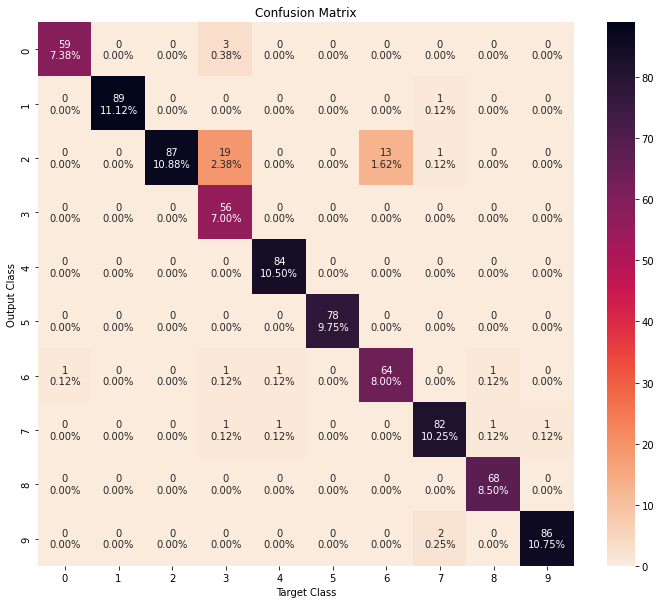

In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((testy.shape[1],testy.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')
# Evaluate the trained model using keras built-in function
score = model.evaluate(testx, testy, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(model.predict(testx), axis=1)
y_true =  np.argmax(testy, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)